<a href="https://www.ibm.com/cloud/watson-studio"><img src = "https://pbs.twimg.com/media/DHSvdkSU0AApZbj.png" width = 400, align = "center"></a>
# <center>Hands On with Watson Studio for Diners Finance and Risk teams</center>

Click here to see an example of project token

<!--- # @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='**********************', project_access_token='***********************')
pc = project.project_context 
-->


## Load the data

We have information about credit card cash advances and we want to know if credit card owners are using those cash advances to pay bills of other credit cards. Diners analysts call this type of incident “Jineteo” and they want to identify it to discourage their clients to do this fraud.

We have a data set with 85 variables and we will use the feature “Decisión” as our target variable.

To load the data set, we need our IBM Cloud Object Storage credentials. If you have a csv file, you can just click *Insert to code* and then *Insert pandas DataFrame*. However, we also can read the information from an excel spreadsheet using the pandas function `read_excel()` like we see in the cell bellow, just change the asterisk with your credentials.

In [1]:
# The code was removed by Watson Studio for sharing.

----- ¡Listo! ------


Now, let’s show the first five rows of the data frame with `df_data_1.head()`.

In [2]:
df_data_1.head()

,CÉDULA,NUMUSODIA,MONTO_TOTAL_DIA,VALOR_AVANCE_DC,VALOR_AVANCE_ID,VALOR_AVANCE_DI,GB_VALOR_AVANCE,GB_DEBMES,SCORE,TRIESGO_DC,...,ID_Linea_Cred,Fecha,ID_VIP,id_mora,Nivel_atribucion,Alerta,Estado,Fecha Revisión,Decisión,OBS
0,16555,2,268.62,"450,5",NaN,NaN,450,"996,49",2,"17202,12",...,NaN,20180826,NaN,NaN,Analista de Monitoreo,NaN,NaN,NaN,NaN,NaN
1,20219,1,131.46,900,NaN,NaN,900,"0,01",2,"3497,15",...,NaN,20180826,NaN,NaN,Analista de Monitoreo,NaN,NaN,NaN,NaN,NaN
2,3807,2,500.92,NaN,NaN,"300,5",300,"0,01",2,"2395,57",...,NaN,20180827,NaN,NaN,Analista de Monitoreo,NaN,En proceso monitoreo,24092018.0,ACTUALIZAR,-
3,13651,1,252.26,"220,5",NaN,NaN,220,"0,01",3,"3417,09",...,NaN,20180827,NaN,NaN,Analista de Monitoreo,NaN,NaN,NaN,NaN,NaN
4,25650,1,143.79,NaN,NaN,400,400,"0,01",1,"767,94",...,NaN,20180827,NaN,NaN,Analista de Monitoreo,NaN,NaN,NaN,NaN,NaN


We can see the dimensions of the data set using `shape`. 

In [3]:
print("Dimensiones del conjunto de datos: ", df_data_1.shape)

Dimensiones del conjunto de datos:  (28281, 85)


## Cleaning and preprocessing of the data
First, let’s count the number of distinct elements per column so we can drop empty columns. We can use the command `df_data_1.notnull().sum()` to count distinct elements in every column. To have a better visualization of the result, we are going to convert it to a pandas data frame with the command `pd.DataFrame()`. Finally, we sort ascending the number of null values using `sort_values()` and then we show the first ten values with `head(10)`.

In [81]:
null_series = pd.DataFrame(df_data_1.notnull().sum(), columns= ["N_No_nulls"])
null_series.sort_values(by="N_No_nulls").head(10)

,N_No_nulls
VAL_CHEQ_MES_DI,0
NUM_CHEQ_MES_DI,0
ID_VIP,0
VAL_CHEQ_MES_ID,3
NUM_CHEQ_MES_ID,3
MONTO_Disp_In,4
NUMUSODIA60,4
VAL_CHEQ_MES_DC,15
NUM_CHEQ_MES_DC,15
NUMUSODIADIV_VALES,3902


There are 9 columns with 15 or less values, we are going to drop those because they are practically empty. 

In [82]:
columnas = null_series[null_series.N_No_nulls > 20].index
datos = df_data_1[columnas]
print("Dimensiones del conjunto de datos original: ", df_data_1.shape[0], " filas,", df_data_1.shape[1], " columnas")
print("Dimensiones del nuevo conjunto de datos: ", datos.shape[0], " filas,", datos.shape[1], " columnas")
datos.head()

Dimensiones del conjunto de datos original:  28281  filas, 85  columnas
Dimensiones del nuevo conjunto de datos:  28281  filas, 76  columnas


,CÉDULA,NUMUSODIA,MONTO_TOTAL_DIA,VALOR_AVANCE_DC,VALOR_AVANCE_ID,VALOR_AVANCE_DI,GB_VALOR_AVANCE,GB_DEBMES,SCORE,TRIESGO_DC,...,Prioridad,ID_Linea_Cred,Fecha,id_mora,Nivel_atribucion,Alerta,Estado,Fecha Revisión,Decisión,OBS
0,16555,2,268.62,"450,5",NaN,NaN,450,"996,49",2,"17202,12",...,Baja,NaN,20180826,NaN,Analista de Monitoreo,NaN,NaN,NaN,NaN,NaN
1,20219,1,131.46,900,NaN,NaN,900,"0,01",2,"3497,15",...,Baja,NaN,20180826,NaN,Analista de Monitoreo,NaN,NaN,NaN,NaN,NaN
2,3807,2,500.92,NaN,NaN,"300,5",300,"0,01",2,"2395,57",...,Baja,NaN,20180827,NaN,Analista de Monitoreo,NaN,En proceso monitoreo,24092018.0,ACTUALIZAR,-
3,13651,1,252.26,"220,5",NaN,NaN,220,"0,01",3,"3417,09",...,Baja,NaN,20180827,NaN,Analista de Monitoreo,NaN,NaN,NaN,NaN,NaN
4,25650,1,143.79,NaN,NaN,400,400,"0,01",1,"767,94",...,Baja,NaN,20180827,NaN,Analista de Monitoreo,NaN,NaN,NaN,NaN,NaN


Let’s remove the columns with the same value in every row. We are going to use a *for* loop to count how many unique values we have in each column and then chose those with at least 2 different values.

In [83]:
cols = [ ] #creamos un vector vacío para guardar las columnas que tengan al dos registros diferentes
for col in datos.columns:
    if len(datos[col].unique()) > 1:
        cols.append(col)
        
#Nos quedamos solo con las columnas que se encuentren en la lista cols
datos = datos[cols]
print("\nDimensiones del nuevo conjunto de datos: ", datos.shape[0], " filas,", datos.shape[1], " columnas")


Dimensiones del nuevo conjunto de datos:  28281  filas, 72  columnas


### Non-representative variables for the model 

We are just going to work with the global variables for Cash Advances, Risk and Payments. We’ll drop the variables related to cancelation code, observations, work enterprise and all dates since those variables are not very useful for the analysis. The variable *PeorCalif12M* is used to compute the credit score of each client and we already have the variable *Score*, so we’ll drop *PeorCalif12M*, too.

In summary, we will remove the following columns with the `drop` command:

* VALOR_AVANCE_DC
* VALOR_AVANCE_ID
* VALOR_AVANCE_DI
* TRIESGO_DC
* TRIESGO_ID
* TRIESGO_DI
* VALOR_FACTURAR_DC
* VALOR_FACTURAR_ID
* VALOR_FACTURAR_DI
* CODRET_DC
* CODRET_ID
* CODRET_DI
* PeorCalf12M
* OBS
* empresa
* Fecha
* Fecha Revisión
* FechaIngresoD
* Nivel_atribucion


In [84]:
datos.drop(['VALOR_AVANCE_DC', 'VALOR_AVANCE_ID', 'VALOR_AVANCE_DI', 'TRIESGO_DC', 'TRIESGO_ID', 'TRIESGO_DI',
            'VALOR_FACTURAR_DC','VALOR_FACTURAR_ID','CODRET_DC', 'CODRET_ID', 'CODRET_DI','VALOR_FACTURAR_DI',
            'PeorCalf12M','OBS','empresa','Fecha','Fecha Revisión','FechaIngresoD', "Nivel_atribucion"], axis=1, inplace=True)
print("\nDimensiones del nuevo conjunto de datos: ", datos.shape[0], " filas,", datos.shape[1], " columnas")


Dimensiones del nuevo conjunto de datos:  28281  filas, 53  columnas


### Column types
Now, we are going to check if the column types are correct. We can do this using `dtypes` with the new data frame *datos*

In [85]:
print("Formato de las  columnas:\n", datos.dtypes)

Formato de las  columnas:
 CÉDULA                                  int64
NUMUSODIA                               int64
MONTO_TOTAL_DIA                       float64
GB_VALOR_AVANCE                         int64
GB_DEBMES                              object
SCORE                                   int64
GB_TRIESGO                            float64
GB_PAGPARCR3                           object
SEGM_DC                                object
SEGM_ID                                object
SEGM_DI                                object
GB_VALOR_FACTURAR                     float64
PROMCONS_DC                            object
PROMCONS_ID                            object
PROMCONS_DI                            object
MAx_Deuda12M                          float64
MAXIMAEXPOSICION                       object
cargo                                  object
tipocargo                              object
esInversionista                        object
esColaborador                          object
Central

We can see that the following variables are type *object* or string, but they must be type *float*:

* GB_DEBMES
* GB_PAGPARCR3
* PROMCONS_DC
* PROMCONS_ID 
* PROMCONS_DI
* MAXIMAEXPOSICION
* Central_vs_Ingreso
* APALNCAMIENTOS_USADOS
* %MAX_EXP_OCUPADO 
* %USO_DC 
* %USO_VI 
* %USO_DI
* STOTMO_DC
* STOTMO_ID
* STOTMO_DI

This happens since the decimal delimiter is a comma instead of a point. We can change the comas by points using the `applymap` method and then convert the columns to type *float*.
Since we have many columns to correct, we are going to define a list with the names of the columns of interest and then apply the function to all columns in that list, doing so the code will be more legible.


In [86]:
col_m = ['GB_DEBMES','GB_PAGPARCR3','PROMCONS_DC', 'PROMCONS_ID', 'PROMCONS_DI', 'MAXIMAEXPOSICION', 'Central_vs_Ingreso', 'APALNCAMIENTOS_USADOS',
       '%MAX_EXP_OCUPADO', '%USO_DC', '%USO_VI', '%USO_DI',"STOTMO_DC","STOTMO_ID", "STOTMO_DI"]

datos[col_m] = datos[col_m].applymap(lambda x: x.replace(",",".") if type(x)==str else x)

datos[col_m] = datos[col_m].astype("float")

Now, let's use `dtypes` and `head` to check the changes.

In [87]:
datos[col_m].head()

,GB_DEBMES,GB_PAGPARCR3,PROMCONS_DC,PROMCONS_ID,PROMCONS_DI,MAXIMAEXPOSICION,Central_vs_Ingreso,APALNCAMIENTOS_USADOS,%MAX_EXP_OCUPADO,%USO_DC,%USO_VI,%USO_DI,STOTMO_DC,STOTMO_ID,STOTMO_DI
0,996.49,1.000000,2416.61250,NaN,NaN,20278.700000,8.925811,5.513500,0.848285,0.866699,0.000000,0.000000,0.0,NaN,NaN
1,0.01,0.927880,5200.63000,0.0,628.227500,3000.000000,2.800288,3.212302,2.009830,0.887007,0.000000,0.248269,0.0,0.0,0.0
2,0.01,1.000000,712.03625,0.0,1093.202500,3000.000000,9.613740,4.440376,3.581903,0.329968,0.038218,0.804440,0.0,0.0,0.0
3,0.01,0.944528,7253.17000,0.0,5083.040000,3000.000000,19.303473,5.667012,3.116857,0.621289,0.004059,0.621159,0.0,0.0,0.0
4,0.01,1.000000,0.00000,NaN,825.065455,16199.421429,7.809432,3.523395,0.528528,0.156722,0.000000,0.801843,0.0,NaN,0.0


In [88]:
datos[col_m].dtypes

GB_DEBMES                float64
GB_PAGPARCR3             float64
PROMCONS_DC              float64
PROMCONS_ID              float64
PROMCONS_DI              float64
MAXIMAEXPOSICION         float64
Central_vs_Ingreso       float64
APALNCAMIENTOS_USADOS    float64
%MAX_EXP_OCUPADO         float64
%USO_DC                  float64
%USO_VI                  float64
%USO_DI                  float64
STOTMO_DC                float64
STOTMO_ID                float64
STOTMO_DI                float64
dtype: object

### Select rows where Estado = “Monitoreado”
Finally, we will filter rows by column *Estado* and select just the rows with Estado == “Monitoreado” since the information in those rows had been monitored and a decision had been made.

In [89]:
datos = datos[datos.Estado == "Monitoreado"]
print("Dimensiones del nuevo conjunto de datos: ", datos.shape[0], " filas,", datos.shape[1], " columnas")
datos.head()

Dimensiones del nuevo conjunto de datos:  15058  filas, 53  columnas


,CÉDULA,NUMUSODIA,MONTO_TOTAL_DIA,GB_VALOR_AVANCE,GB_DEBMES,SCORE,GB_TRIESGO,GB_PAGPARCR3,SEGM_DC,SEGM_ID,...,AletraControlSociosNuevos,AletraControlPaypal,AletraControlDisponibleIn,AletraControlDivisionVales,Prioridad,ID_Linea_Cred,id_mora,Alerta,Estado,Decisión
5,1231,1,300.00,1000,5.15,4,2627.38,1.000000,1DC,000,...,NaN,NaN,NaN,NaN,Baja,NaN,NaN,NaN,Monitoreado,CUPOS ATM
14,7300,1,153.15,500,0.01,2,9282.22,0.965915,2DC,NaN,...,NaN,NaN,NaN,NaN,Baja,NaN,NaN,NaN,Monitoreado,CUPOS ATM
15,7502,1,426.00,980,0.01,2,6626.08,1.000000,2DC,NaN,...,NaN,NaN,NaN,NaN,Baja,NaN,NaN,NaN,Monitoreado,CUPOS ATM
17,7977,3,301.50,904,0.01,2,10333.27,1.000000,3DC,NaN,...,NaN,NaN,NaN,NaN,Baja,NaN,NaN,NaN,Monitoreado,CUPOS ATM
22,10447,1,500.00,971,0.01,4,8362.32,1.000000,2DC,000,...,NaN,NaN,NaN,NaN,Baja,NaN,NaN,NaN,Monitoreado,CUPOS ATM


## Feature Engineering

Now, we are going to do some feature engineering with the credit card segments. We’ll create a new variable where we’ll store the lowest segment of each credit card.

First, let’s group by segments using `groupBy()` and check how many rows are in each category using `agg(“count”).


In [90]:
print(datos.groupby("SEGM_DC")["CÉDULA"].agg("count"))
print(datos.groupby("SEGM_ID")["CÉDULA"].agg("count"))
print(datos.groupby("SEGM_DI")["CÉDULA"].agg("count"))

SEGM_DC
000     110
1DC    1389
2DC    3020
3DC    5775
4DC    1064
5DC     115
Name: CÉDULA, dtype: int64
SEGM_ID
000     169
1DC     658
2DC    1436
3DC    3861
4DC     857
5DC     114
7DC       1
Name: CÉDULA, dtype: int64
SEGM_DI
000      25
1DC    2159
2DC    2789
3DC    2338
4DC     205
5DC      14
Name: CÉDULA, dtype: int64


We have just one row with segment “7DC” and we are going to delete it. Please, write the code to do so in the following cell.

**Note**: In order to run the next cells we need to remove the row with “SEGM_ID == ‘7DC’” . If you don’t know how to code that, open this cell to see the answer.
<!--
#Answer
datos = datos[datos.SEGM_ID!="7DC"]
-->

In [91]:
datos = datos[datos.SEGM_ID!="7DC"]

Let's codify the segments to numbers so we can perform operations with them. Note that we assign the unknown category *000* the highest segment.

In [92]:
segmentos = {"SEGM_DC":     {"1DC": 0, "2DC": 1,"3DC": 2, "4DC": 3,"5DC": 4, "000": 5},
                "SEGM_ID":     {"1DC": 0, "2DC": 1,"3DC": 2, "4DC": 3,"5DC": 4, "000": 5},
                "SEGM_DI":     {"1DC": 0, "2DC": 1,"3DC": 2, "4DC": 3,"5DC": 4, "000": 5}}
datos.replace(segmentos, inplace=True)
datos[['SEGM_DC','SEGM_ID', 'SEGM_DI']].head(10)

,SEGM_DC,SEGM_ID,SEGM_DI
5,0.0,5.0,NaN
14,1.0,NaN,1.0
15,1.0,NaN,1.0
17,2.0,NaN,NaN
22,1.0,5.0,NaN
27,2.0,NaN,2.0
32,NaN,2.0,NaN
36,1.0,1.0,1.0
38,1.0,1.0,NaN
41,1.0,1.0,NaN


With the variables already codified, we can create the new desired variable by selecting the minimum value between *'SEGM_DC','SEGM_ID', 'SEGM_DI'*. Let’s call it *SEGMENTO_GB*.

We can use the function `min(axis=1)` to do the above.

In [93]:
datos["SEGMENTO_GB"]= datos[['SEGM_DC','SEGM_ID', 'SEGM_DI']].min(axis=1)
datos[['SEGM_DC','SEGM_ID', 'SEGM_DI', "SEGMENTO_GB"]].head(10)

,SEGM_DC,SEGM_ID,SEGM_DI,SEGMENTO_GB
5,0.0,5.0,NaN,0.0
14,1.0,NaN,1.0,1.0
15,1.0,NaN,1.0,1.0
17,2.0,NaN,NaN,2.0
22,1.0,5.0,NaN,1.0
27,2.0,NaN,2.0,2.0
32,NaN,2.0,NaN,2.0
36,1.0,1.0,1.0,1.0
38,1.0,1.0,NaN,1.0
41,1.0,1.0,NaN,1.0


Let's remove 'SEGM_DC','SEGM_ID' and 'SEGM_DI' to work only with SEGMENTO_GB.

In [94]:
datos = datos.drop(['SEGM_DC','SEGM_ID', 'SEGM_DI'], axis=1)
datos.columns

Index(['CÉDULA', 'NUMUSODIA', 'MONTO_TOTAL_DIA', 'GB_VALOR_AVANCE',
       'GB_DEBMES', 'SCORE', 'GB_TRIESGO', 'GB_PAGPARCR3', 'GB_VALOR_FACTURAR',
       'PROMCONS_DC', 'PROMCONS_ID', 'PROMCONS_DI', 'MAx_Deuda12M',
       'MAXIMAEXPOSICION', 'cargo', 'tipocargo', 'esInversionista',
       'esColaborador', 'Central_vs_Ingreso', 'APALNCAMIENTOS_USADOS',
       '%MAX_EXP_OCUPADO', '%USO_DC', '%USO_VI', '%USO_DI', 'NumAlertas',
       'STOTMO_DC', 'STOTMO_ID', 'STOTMO_DI', 'NUMUSODIADIV_VALES',
       'MONTO_Div_vales', 'AlertaAltoRiesgo', 'AlertaAceleraMismoMes',
       'AlertaAceleracionEntreMeses', 'AlertaApalancamientoGlobal',
       'AlertaConsumoCapitalTrabajo', 'AlertaSobreapalancamiento',
       'AlertaControlAutorizadorAutomatico', 'AletraControlAutoconsumos',
       'AletraControlForex', 'AletraControlCasinoUsos',
       'AletraControlSociosNuevos', 'AletraControlPaypal',
       'AletraControlDisponibleIn', 'AletraControlDivisionVales', 'Prioridad',
       'ID_Linea_Cred', 'id_m

## Dealing with null values

First, let’s count the number of non-null values in each column using `datos.notnull().sum()`.

In [95]:
datos.notnull().sum()

CÉDULA                                15057
NUMUSODIA                             15057
MONTO_TOTAL_DIA                       15057
GB_VALOR_AVANCE                       15057
GB_DEBMES                             15057
SCORE                                 15057
GB_TRIESGO                            15057
GB_PAGPARCR3                          15057
GB_VALOR_FACTURAR                     15057
PROMCONS_DC                           11472
PROMCONS_ID                            7095
PROMCONS_DI                            7530
MAx_Deuda12M                          12088
MAXIMAEXPOSICION                      12013
cargo                                 14979
tipocargo                             15057
esInversionista                       15057
esColaborador                         15057
Central_vs_Ingreso                    14835
APALNCAMIENTOS_USADOS                 15057
%MAX_EXP_OCUPADO                      15057
%USO_DC                               15057
%USO_VI                         

We have son columns with null values. We will fill those null values with zeros.
* NUMUSODIADIV_VALES
* MONTO_Div_vales
* PROMCONS_DC
* PROMCONS_ID
* PROMCONS_DI
* Central_vs_Ingreso
* MAx_Deuda12M
* STOTMO_DC                            
* STOTMO_ID                              
* STOTMO_DI                              

In [96]:
datos['NUMUSODIADIV_VALES'] = datos['NUMUSODIADIV_VALES'].fillna(0)
datos['MONTO_Div_vales'] = datos['MONTO_Div_vales'].fillna(0)
datos['PROMCONS_DC'] = datos['PROMCONS_DC'].fillna(0)
datos['PROMCONS_ID'] = datos['PROMCONS_ID'].fillna(0)
datos['PROMCONS_DI'] = datos['PROMCONS_DI'].fillna(0)
datos['Central_vs_Ingreso'] = datos['Central_vs_Ingreso'].fillna(0)
datos['MAx_Deuda12M'] = datos['MAx_Deuda12M'].fillna(0)
datos['STOTMO_DC'] = datos['STOTMO_DC'].fillna(0)
datos['STOTMO_ID'] = datos['STOTMO_ID'].fillna(0)
datos['STOTMO_DI'] = datos['STOTMO_DI'].fillna(0)

datos[['NUMUSODIADIV_VALES', 'MONTO_Div_vales','PROMCONS_DC','PROMCONS_ID', 'PROMCONS_DI']].head()

,NUMUSODIADIV_VALES,MONTO_Div_vales,PROMCONS_DC,PROMCONS_ID,PROMCONS_DI
5,0.0,0.0,540.54250,1163.7,0.0000
14,0.0,0.0,538.31500,0.0,800.7725
15,0.0,0.0,718.21000,0.0,419.4180
17,0.0,0.0,2464.60625,0.0,0.0000
22,0.0,0.0,1145.73500,0.0,0.0000


### Average usage variables
We are going to sum the average credit card usage for each row to create a variable called *SUM_PROM_CONS*.  After that we will remove the usage variables *'PROMCONS_DC', 'PROMCONS_ID' y 'PROMCONS_DI'*.


In [97]:
datos['SUM_PROM_CONS'] = datos[['PROMCONS_DC', 'PROMCONS_ID','PROMCONS_DI']].sum(axis = 1)
datos[['PROMCONS_DC', 'PROMCONS_ID','PROMCONS_DI', 'SUM_PROM_CONS']].head()


,PROMCONS_DC,PROMCONS_ID,PROMCONS_DI,SUM_PROM_CONS
5,540.54250,1163.7,0.0000,1704.24250
14,538.31500,0.0,800.7725,1339.08750
15,718.21000,0.0,419.4180,1137.62800
17,2464.60625,0.0,0.0000,2464.60625
22,1145.73500,0.0,0.0000,1145.73500


In [98]:
# eliminamos las columnas de promedio de consumo parciales
datos.drop(['PROMCONS_DC', 'PROMCONS_ID','PROMCONS_DI'], axis=1, inplace = True)
print("Eliminadas las columnas 'PROMCONS_DC', 'PROMCONS_ID','PROMCONS_DI'")

Eliminadas las columnas 'PROMCONS_DC', 'PROMCONS_ID','PROMCONS_DI'


### Binary variable for arrears
Let’s create a new variable which shows whether a client has arrears or not using the variable *id_mora*. We can see that there are clients who have “No Mora” even though having relatively small unpaid values in the variables *STOTMO_DC, STOTMO_ID y STOTMO_DI*.

We are going to create a binary variable to check if the highest unpaid value of each credit card is greater than 50 dollars; if true, that client has arrears.


In [99]:
index_mora = datos.query('id_mora=="No Mora"&(STOTMO_DC>0|STOTMO_ID>0|STOTMO_DI>0)').index
datos.loc[index_mora,["id_mora",'STOTMO_DC', 'STOTMO_ID', 'STOTMO_DI']].describe()


,STOTMO_DC,STOTMO_ID,STOTMO_DI
count,75.00000,75.000000,75.000000
mean,4.41400,2.535467,4.140400
std,9.08702,8.015001,10.209364
min,0.00000,0.000000,0.000000
25%,0.00000,0.000000,0.000000
50%,0.63000,0.000000,0.000000
75%,4.08500,0.000000,0.000000
max,43.49000,48.340000,38.230000


First, let’s reset the index of the data frame since we have filtered some rows. We can do that using the command `reset_index(drop = True)`, adding `drop = True` won’t create column with the previous index in the data frame.

In [100]:
datos = datos.reset_index(drop = True)
datos.head()

,CÉDULA,NUMUSODIA,MONTO_TOTAL_DIA,GB_VALOR_AVANCE,GB_DEBMES,SCORE,GB_TRIESGO,GB_PAGPARCR3,GB_VALOR_FACTURAR,MAx_Deuda12M,...,AletraControlDisponibleIn,AletraControlDivisionVales,Prioridad,ID_Linea_Cred,id_mora,Alerta,Estado,Decisión,SEGMENTO_GB,SUM_PROM_CONS
0,1231,1,300.00,1000,5.15,4,2627.38,1.000000,794.98,691.38,...,NaN,NaN,Baja,NaN,NaN,NaN,Monitoreado,CUPOS ATM,0.0,1704.24250
1,7300,1,153.15,500,0.01,2,9282.22,0.965915,487.54,9174.57,...,NaN,NaN,Baja,NaN,NaN,NaN,Monitoreado,CUPOS ATM,1.0,1339.08750
2,7502,1,426.00,980,0.01,2,6626.08,1.000000,1696.49,818.21,...,NaN,NaN,Baja,NaN,NaN,NaN,Monitoreado,CUPOS ATM,1.0,1137.62800
3,7977,3,301.50,904,0.01,2,10333.27,1.000000,2385.69,45.00,...,NaN,NaN,Baja,NaN,NaN,NaN,Monitoreado,CUPOS ATM,2.0,2464.60625
4,10447,1,500.00,971,0.01,4,8362.32,1.000000,1588.07,1155.29,...,NaN,NaN,Baja,NaN,NaN,NaN,Monitoreado,CUPOS ATM,1.0,1145.73500


Now, let’s create the logical condition for the arrears variable which we will call *MORA_BIN* and it will be 1 if the client has arrears and 0 otherwise.
After that, we drop the variables 'id_mora', STOTMO_DC', 'STOTMO_ID' and  'STOTMO_DI'. 

In [101]:
mora = [ ]
for i in range(len(datos)):
    if datos.loc[i, ["STOTMO_DC", 'STOTMO_ID', 'STOTMO_DI']].max()>50:
        mora.append(1)
    else: 
        mora.append(0)

datos["MORA_BIN"] = mora

datos[["id_mora","MORA_BIN", 'STOTMO_DC', 'STOTMO_ID', 'STOTMO_DI']].head()

,id_mora,MORA_BIN,STOTMO_DC,STOTMO_ID,STOTMO_DI
0,NaN,0,0.0,0.0,0.0
1,NaN,0,0.0,0.0,0.0
2,NaN,0,0.0,0.0,0.0
3,NaN,0,0.0,0.0,0.0
4,NaN,0,0.0,0.0,0.0


Write the code to remove the variables: 'id_mora', STOTMO_DC', 'STOTMO_ID' and 'STOTMO_DI' in the following cell.

In [102]:
datos = datos.drop(['id_mora','STOTMO_DC', 'STOTMO_ID', 'STOTMO_DI'], axis = 1)
datos.columns

Index(['CÉDULA', 'NUMUSODIA', 'MONTO_TOTAL_DIA', 'GB_VALOR_AVANCE',
       'GB_DEBMES', 'SCORE', 'GB_TRIESGO', 'GB_PAGPARCR3', 'GB_VALOR_FACTURAR',
       'MAx_Deuda12M', 'MAXIMAEXPOSICION', 'cargo', 'tipocargo',
       'esInversionista', 'esColaborador', 'Central_vs_Ingreso',
       'APALNCAMIENTOS_USADOS', '%MAX_EXP_OCUPADO', '%USO_DC', '%USO_VI',
       '%USO_DI', 'NumAlertas', 'NUMUSODIADIV_VALES', 'MONTO_Div_vales',
       'AlertaAltoRiesgo', 'AlertaAceleraMismoMes',
       'AlertaAceleracionEntreMeses', 'AlertaApalancamientoGlobal',
       'AlertaConsumoCapitalTrabajo', 'AlertaSobreapalancamiento',
       'AlertaControlAutorizadorAutomatico', 'AletraControlAutoconsumos',
       'AletraControlForex', 'AletraControlCasinoUsos',
       'AletraControlSociosNuevos', 'AletraControlPaypal',
       'AletraControlDisponibleIn', 'AletraControlDivisionVales', 'Prioridad',
       'ID_Linea_Cred', 'Alerta', 'Estado', 'Decisión', 'SEGMENTO_GB',
       'SUM_PROM_CONS', 'MORA_BIN'],
      dtype=

### Variable SOBRECUPO
Using the same reasoning, let’s create a new variable called ‘SOBRECUPO’ which value is 1 if the maximum value of percentage of usage is greater that 1 and 0 otherwise. Then, we will remove the three variables of percentage of usage.

Write the code below.


In [103]:
scupo = [ ]
for i in range(len(datos)):
    if datos.loc[i, ['%USO_DC', '%USO_VI', '%USO_DI']].max()>1:
        scupo.append(1)
    else: 
        scupo.append(0)

datos["SOBRECUPO"] = scupo
datos.drop(['%USO_DC', '%USO_VI', '%USO_DI'], axis=1,inplace=True)
datos.columns

Index(['CÉDULA', 'NUMUSODIA', 'MONTO_TOTAL_DIA', 'GB_VALOR_AVANCE',
       'GB_DEBMES', 'SCORE', 'GB_TRIESGO', 'GB_PAGPARCR3', 'GB_VALOR_FACTURAR',
       'MAx_Deuda12M', 'MAXIMAEXPOSICION', 'cargo', 'tipocargo',
       'esInversionista', 'esColaborador', 'Central_vs_Ingreso',
       'APALNCAMIENTOS_USADOS', '%MAX_EXP_OCUPADO', 'NumAlertas',
       'NUMUSODIADIV_VALES', 'MONTO_Div_vales', 'AlertaAltoRiesgo',
       'AlertaAceleraMismoMes', 'AlertaAceleracionEntreMeses',
       'AlertaApalancamientoGlobal', 'AlertaConsumoCapitalTrabajo',
       'AlertaSobreapalancamiento', 'AlertaControlAutorizadorAutomatico',
       'AletraControlAutoconsumos', 'AletraControlForex',
       'AletraControlCasinoUsos', 'AletraControlSociosNuevos',
       'AletraControlPaypal', 'AletraControlDisponibleIn',
       'AletraControlDivisionVales', 'Prioridad', 'ID_Linea_Cred', 'Alerta',
       'Estado', 'Decisión', 'SEGMENTO_GB', 'SUM_PROM_CONS', 'MORA_BIN',
       'SOBRECUPO'],
      dtype='object')

### Variable RECURRENCIA
We are going to create a variable called RECURRENCIA where 1 indicates that the ID Number in the variable "CÉDULA" appears more than once and 0 otherwise.


In [104]:
rec = pd.DataFrame(datos.groupby("CÉDULA")["CÉDULA"].agg("count"))
rec = rec[rec.CÉDULA > 1]
datos["RECURRENCIA"] = datos.CÉDULA.map(lambda x: 1 if x in rec.CÉDULA else 0)
datos[datos.RECURRENCIA >0].head()

,CÉDULA,NUMUSODIA,MONTO_TOTAL_DIA,GB_VALOR_AVANCE,GB_DEBMES,SCORE,GB_TRIESGO,GB_PAGPARCR3,GB_VALOR_FACTURAR,MAx_Deuda12M,...,Prioridad,ID_Linea_Cred,Alerta,Estado,Decisión,SEGMENTO_GB,SUM_PROM_CONS,MORA_BIN,SOBRECUPO,RECURRENCIA
1,7300,1,153.15,500,0.01,2,9282.22,0.965915,487.54,9174.57,...,Baja,NaN,NaN,Monitoreado,CUPOS ATM,1.0,1339.087500,0,0,1
2,7502,1,426.00,980,0.01,2,6626.08,1.000000,1696.49,818.21,...,Baja,NaN,NaN,Monitoreado,CUPOS ATM,1.0,1137.628000,0,0,1
3,7977,3,301.50,904,0.01,2,10333.27,1.000000,2385.69,45.00,...,Baja,NaN,NaN,Monitoreado,CUPOS ATM,2.0,2464.606250,0,0,1
4,10447,1,500.00,971,0.01,4,8362.32,1.000000,1588.07,1155.29,...,Baja,NaN,NaN,Monitoreado,CUPOS ATM,1.0,1145.735000,0,1,1
5,7560,4,402.00,1293,0.01,2,9560.00,1.000000,2784.49,10745.08,...,Baja,NaN,NaN,Monitoreado,CUPOS ATM,2.0,3032.054167,0,1,1


### Alert related variables, job, credit line and maximum exposure
Let’s check the number of null values in the remaining independent variables. We can do that with `isnull().sum()`.


In [105]:
col_nulos = datos.isnull().sum() #We are saving the information to a list, so we can filter it.
col_nulos[col_nulos>0]

MAXIMAEXPOSICION               3044
cargo                            78
AletraControlCasinoUsos         156
AletraControlSociosNuevos      8543
AletraControlPaypal            9006
AletraControlDisponibleIn     13549
AletraControlDivisionVales    13549
ID_Linea_Cred                  9006
Alerta                         9476
dtype: int64

We are more interested in the total number of alerts instead of the type of alert, so we are going to remove those alert related columns.
There is already the Credit Score variable in the data set, so we don’t need “Cargo” (job) and “MAXIMAEXPOSICION”.

Finally, we don’t need the column ‘Alerta’, since this data set has information about the “Jineteo” type of transactions. Later, we’ll create the dependent variable on the basis of the information in the column “Decisión”.

In [106]:
datos = datos.drop([ 'AlertaAltoRiesgo',
       'AlertaAceleraMismoMes', 'AlertaAceleracionEntreMeses',
       'AlertaApalancamientoGlobal', 'AlertaConsumoCapitalTrabajo',
       'AlertaSobreapalancamiento', 'AlertaControlAutorizadorAutomatico',
       'AletraControlAutoconsumos', 'AletraControlForex',
       'AletraControlCasinoUsos', 'AletraControlSociosNuevos',
       'AletraControlPaypal', 'AletraControlDisponibleIn',
       'AletraControlDivisionVales', 'MAXIMAEXPOSICION',  'ID_Linea_Cred', 'cargo', 'Alerta'], axis = 1)
datos.isnull().sum()

CÉDULA                   0
NUMUSODIA                0
MONTO_TOTAL_DIA          0
GB_VALOR_AVANCE          0
GB_DEBMES                0
SCORE                    0
GB_TRIESGO               0
GB_PAGPARCR3             0
GB_VALOR_FACTURAR        0
MAx_Deuda12M             0
tipocargo                0
esInversionista          0
esColaborador            0
Central_vs_Ingreso       0
APALNCAMIENTOS_USADOS    0
%MAX_EXP_OCUPADO         0
NumAlertas               0
NUMUSODIADIV_VALES       0
MONTO_Div_vales          0
Prioridad                0
Estado                   0
Decisión                 0
SEGMENTO_GB              0
SUM_PROM_CONS            0
MORA_BIN                 0
SOBRECUPO                0
RECURRENCIA              0
dtype: int64

## The target variable
Now, let’s define the target variable for our machine learning model. We’ll do this using the column *Decisión*.


In [108]:
datos.groupby("Decisión")[["Decisión"]].agg("count")

,Decisión
Decisión,
BX43,4
CUPOS ATM,14716
JUSTIFICADO,331
MONITOREADA DICIEMBRE,6


Let’s remove the rows with “Decisión == ‘MONITOREADA DICIEMBRE’”. Write the code bellow.

In [109]:
datos = datos[datos.Decisión != "MONITOREADA DICIEMBRE"]

In [110]:
datos["JINETEO"] = datos.Decisión.map(lambda x: 0 if x=="JUSTIFICADO" else 1)
datos.head()

,CÉDULA,NUMUSODIA,MONTO_TOTAL_DIA,GB_VALOR_AVANCE,GB_DEBMES,SCORE,GB_TRIESGO,GB_PAGPARCR3,GB_VALOR_FACTURAR,MAx_Deuda12M,...,MONTO_Div_vales,Prioridad,Estado,Decisión,SEGMENTO_GB,SUM_PROM_CONS,MORA_BIN,SOBRECUPO,RECURRENCIA,JINETEO
0,1231,1,300.00,1000,5.15,4,2627.38,1.000000,794.98,691.38,...,0.0,Baja,Monitoreado,CUPOS ATM,0.0,1704.24250,0,0,0,1
1,7300,1,153.15,500,0.01,2,9282.22,0.965915,487.54,9174.57,...,0.0,Baja,Monitoreado,CUPOS ATM,1.0,1339.08750,0,0,1,1
2,7502,1,426.00,980,0.01,2,6626.08,1.000000,1696.49,818.21,...,0.0,Baja,Monitoreado,CUPOS ATM,1.0,1137.62800,0,0,1,1
3,7977,3,301.50,904,0.01,2,10333.27,1.000000,2385.69,45.00,...,0.0,Baja,Monitoreado,CUPOS ATM,2.0,2464.60625,0,0,1,1
4,10447,1,500.00,971,0.01,4,8362.32,1.000000,1588.07,1155.29,...,0.0,Baja,Monitoreado,CUPOS ATM,1.0,1145.73500,0,1,1,1


The final data set is almost ready. Now, we’ll remove the columns 'CÉDULA','Estado' and  'Decisión', since we don’t need them for the analysis.

In [114]:
datos = datos.drop(['CÉDULA','Estado', 'Decisión'], axis = 1)
datos.shape

(15051, 25)

In [115]:
datos.columns

Index(['NUMUSODIA', 'MONTO_TOTAL_DIA', 'GB_VALOR_AVANCE', 'GB_DEBMES', 'SCORE',
       'GB_TRIESGO', 'GB_PAGPARCR3', 'GB_VALOR_FACTURAR', 'MAx_Deuda12M',
       'tipocargo', 'esInversionista', 'esColaborador', 'Central_vs_Ingreso',
       'APALNCAMIENTOS_USADOS', '%MAX_EXP_OCUPADO', 'NumAlertas',
       'NUMUSODIADIV_VALES', 'MONTO_Div_vales', 'Prioridad', 'SEGMENTO_GB',
       'SUM_PROM_CONS', 'MORA_BIN', 'SOBRECUPO', 'RECURRENCIA', 'JINETEO'],
      dtype='object')

## Data visualization
PixieDust is an open source python library which works as an add-on to Jupyter notebooks and it helps to improve the user experience of working with data by allowing us to create nice graphs with less lines of code. You can find more information about this library in the following link.

[PixieDust](https://github.com/pixiedust/pixiedust "PixieDust GitHub page")

Let's import this library and create some plots. 

In [116]:
import pixiedust

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table USER_PREFERENCES created successfully
Table service_connections created successfully


 ### Histograms
Create histograms with continuous variables.


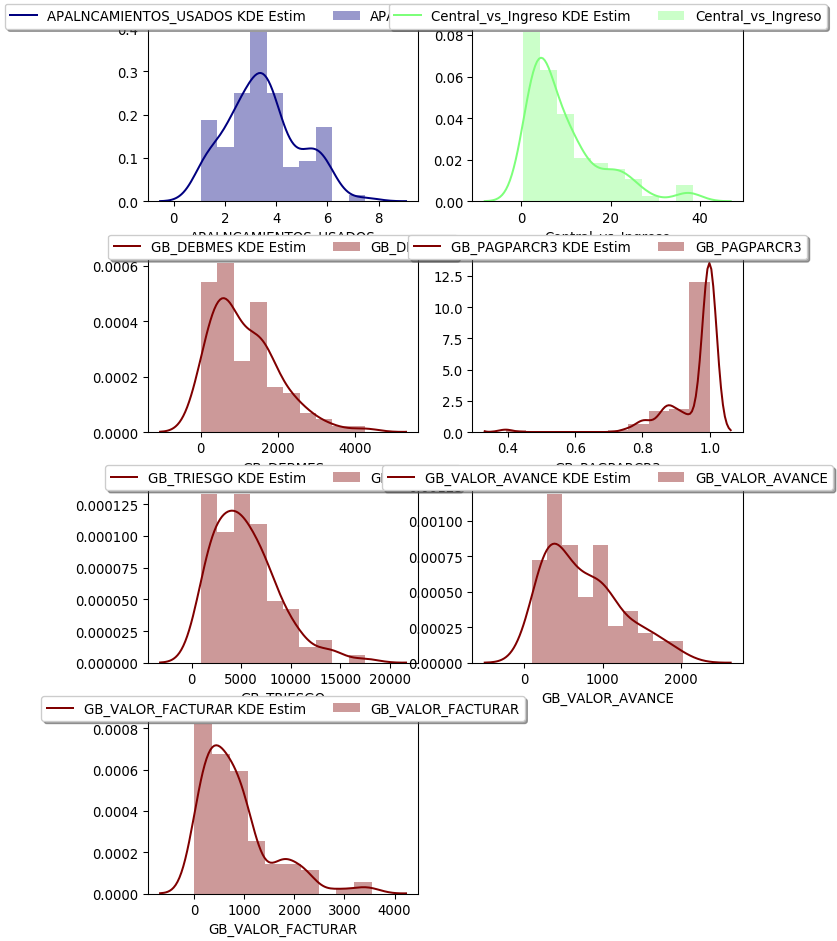

In [37]:
display(datos)

### Bar graphs

Using the function display, create a bar plot using the variable *SCORE*.

In [117]:
display(datos)

### Scatter plots

Finally, let's create a scatter plot using the variables "MAX_Deuda12M" and "GB_DEBMES".


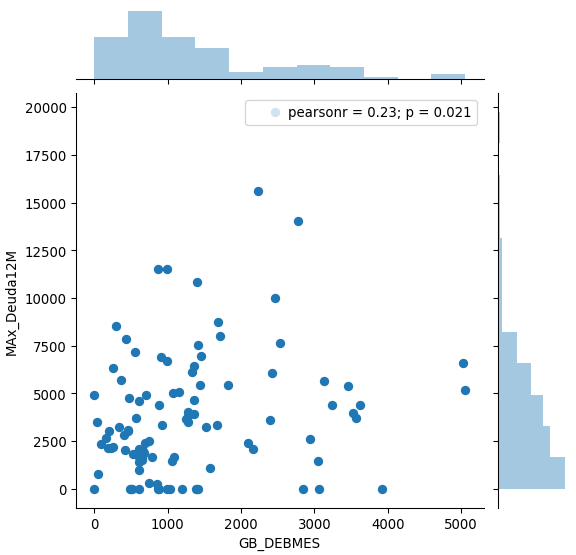

In [118]:
display(datos)

## Save the final data set
To save the clean and processed data set to a csv file, first we need to create a project token in the *Settings” part of the project.

After that, we are going to insert the token in the notebook by clicking the three dot symbol in upper right part of the notebook and selecting "Insert project token".

**Note**: you need administrator privileges to create project tokes.

Finally, we save the data set with the command `project.save_data("Nombre.csv", datos.to_csv())`. We’ll name the file "Jineteo_Limpio.csv" and pass the parameters `header=True` and `index = False` to the function `to_csv()`, so the first row in the csv file has the names of the columns and it doesn’t contain an unnecessary index column.


In [119]:
project.save_data("Jineteo_Limpio.csv", datos.to_csv(header=True, index = False), overwrite = True)

NameError: name 'project' is not defined